In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from typing import List, Tuple
import matplotlib.pyplot as plt
import math

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

diabetes_data = fetch_ucirepo(id=296)

X = diabetes_data.data.features
y = diabetes_data.data.targets
y = y.values.ravel()

seed = 1234
np.random.seed(seed)  

#Process data
obj_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

num_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

obj_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_cols),
        ('cat', obj_transform, obj_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

results = {}
conf_matrices = {}

In [13]:
df.describe()

NameError: name 'df' is not defined

In [3]:
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(random_state=seed, max_iter=2000))])
logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)

report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_mtx_logistic = confusion_matrix(y_test, y_pred_logistic)
results["Logistic Regression"] = {
        'accuracy': accuracy_logistic,
        'f1_score': report_logistic['weighted avg']['f1-score'],
        'report': report_logistic
    }
conf_matrices["Logistic Regression"] = conf_mtx_logistic
print("Logistic Regression")
print(report_logistic)
print(accuracy_logistic)
print(conf_mtx_logistic)

Logistic Regression
{'<30': {'precision': 0.29045643153526973, 'recall': 0.024544179523141654, 'f1-score': 0.04526349822179114, 'support': 2852.0}, '>30': {'precision': 0.49645868465430015, 'recall': 0.3313822602431337, 'f1-score': 0.3974618604023221, 'support': 8884.0}, 'NO': {'precision': 0.6050023351149395, 'recall': 0.8506493506493507, 'f1-score': 0.7070988871031325, 'support': 13706.0}, 'accuracy': 0.5767235280245264, 'macro avg': {'precision': 0.4639724837681698, 'recall': 0.402191930138542, 'f1-score': 0.3832747485757486, 'support': 25442.0}, 'weighted avg': {'precision': 0.5318403703440278, 'recall': 0.5767235280245264, 'f1-score': 0.5247873599315428, 'support': 25442.0}}
0.5767235280245264
[[   70  1014  1768]
 [   96  2944  5844]
 [   75  1972 11659]]


In [4]:
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', RandomForestClassifier(random_state=seed))])
random_forest_pipeline.fit(X_train, y_train)
y_pred_rf = random_forest_pipeline.predict(X_test)

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_mtx_rf = confusion_matrix(y_test, y_pred_rf)

results["Random Forest"] = {
    'accuracy': accuracy_rf,
    'f1_score': report_rf['weighted avg']['f1-score'],
    'report': report_rf
}
conf_matrices["Random Forest"] = conf_mtx_rf

print("Random Forest")
print(report_rf)
print(accuracy_rf)
print(conf_mtx_rf)

Random Forest
{'<30': {'precision': 0.46, 'recall': 0.008064516129032258, 'f1-score': 0.015851137146795313, 'support': 2852.0}, '>30': {'precision': 0.5159873506676037, 'recall': 0.3305943268797839, 'f1-score': 0.40299121844127334, 'support': 8884.0}, 'NO': {'precision': 0.6058883248730964, 'recall': 0.8708594776010506, 'f1-score': 0.7146021672753398, 'support': 13706.0}, 'accuracy': 0.5854885622199513, 'macro avg': {'precision': 0.5272918918469001, 'recall': 0.40317277353662223, 'f1-score': 0.3778148409544695, 'support': 25442.0}, 'weighted avg': {'precision': 0.5581423238755464, 'recall': 0.5854885622199513, 'f1-score': 0.5274631999233842, 'support': 25442.0}}
0.5854885622199513
[[   23   991  1838]
 [   21  2937  5926]
 [    6  1764 11936]]


In [5]:
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', KNeighborsClassifier(n_neighbors=100))])
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mtx_knn = confusion_matrix(y_test, y_pred_knn)

results["KNN"] = {
    'accuracy': accuracy_knn,
    'f1_score': report_knn['weighted avg']['f1-score'],
    'report': report_knn
}
conf_matrices["KNN"] = conf_mtx_knn

print("K-Nearest Neighbors")
print(report_knn)
print(accuracy_knn)
print(conf_mtx_knn)



K-Nearest Neighbors
{'<30': {'precision': 0.4057971014492754, 'recall': 0.009817671809256662, 'f1-score': 0.019171516603902775, 'support': 2852.0}, '>30': {'precision': 0.5121512151215122, 'recall': 0.25619090499774877, 'f1-score': 0.3415366146458583, 'support': 8884.0}, 'NO': {'precision': 0.5897080605857901, 'recall': 0.9004815409309791, 'f1-score': 0.7126894759636206, 'support': 13706.0}, 'accuracy': 0.5756622907004166, 'macro avg': {'precision': 0.5025521257188592, 'recall': 0.38883003924599485, 'f1-score': 0.35779920240446056, 'support': 25442.0}, 'weighted avg': {'precision': 0.5420101960090278, 'recall': 0.5756622907004166, 'f1-score': 0.5053459007713829, 'support': 25442.0}}
0.5756622907004166
[[   28   820  2004]
 [   25  2276  6583]
 [   16  1348 12342]]


In [6]:
best_hyperparams = {
    'hidden_layer_sizes': [500],
    'solver': 'sgd',
    'learning_rate_init': 0.01,
    'max_iter': 20
}
nn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', MLPClassifier(**best_hyperparams, shuffle=True, random_state=seed, verbose=False))])
nn_pipeline.fit(X_train, y_train)
y_pred_nn = nn_pipeline.predict(X_test)

report_nn = classification_report(y_test, y_pred_nn, output_dict=True)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_mtx_nn = confusion_matrix(y_test, y_pred_nn)

results["Neural Networks"] = {
    'accuracy': accuracy_nn,
    'f1_score': report_nn['weighted avg']['f1-score'],
    'report': report_nn
}
conf_matrices["Neural Networks"] = conf_mtx_nn

print("Neural Networks")
print(report_nn)
print(accuracy_nn)
print(conf_mtx_nn)

Neural Networks
{'<30': {'precision': 0.36548223350253806, 'recall': 0.025245441795231416, 'f1-score': 0.04722859954083306, 'support': 2852.0}, '>30': {'precision': 0.512766332100722, 'recall': 0.32778027915353447, 'f1-score': 0.3999175993957289, 'support': 8884.0}, 'NO': {'precision': 0.606357967903506, 'recall': 0.865606303808551, 'f1-score': 0.7131522000480884, 'support': 13706.0}, 'accuracy': 0.5836019180882006, 'macro avg': {'precision': 0.4948688445022554, 'recall': 0.4062106749191056, 'f1-score': 0.3867661329948835, 'support': 25442.0}, 'weighted avg': {'precision': 0.5466753294716415, 'recall': 0.5836019180882006, 'f1-score': 0.529126168256474, 'support': 25442.0}}
0.5836019180882006
[[   72   971  1809]
 [   79  2912  5893]
 [   46  1796 11864]]


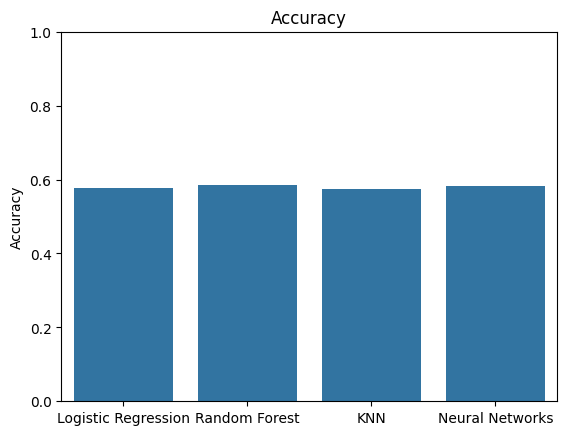

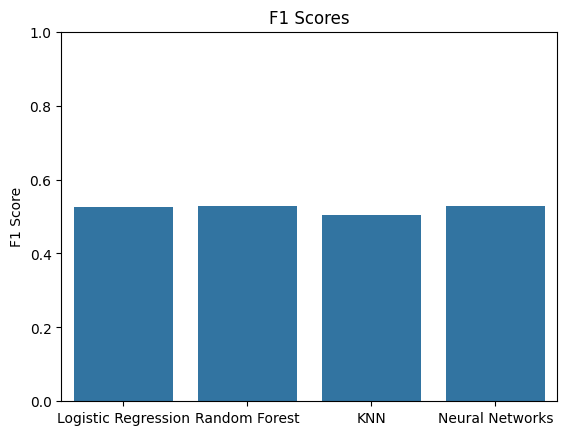

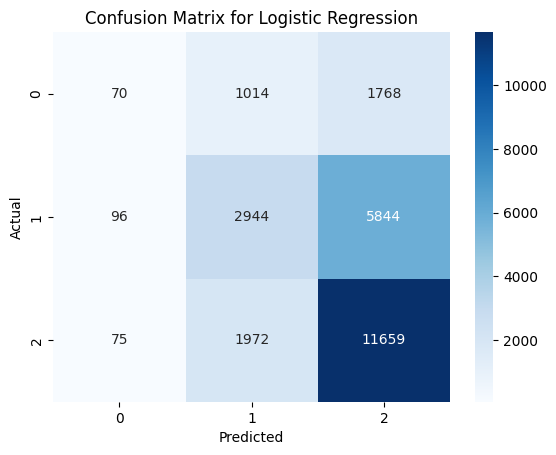

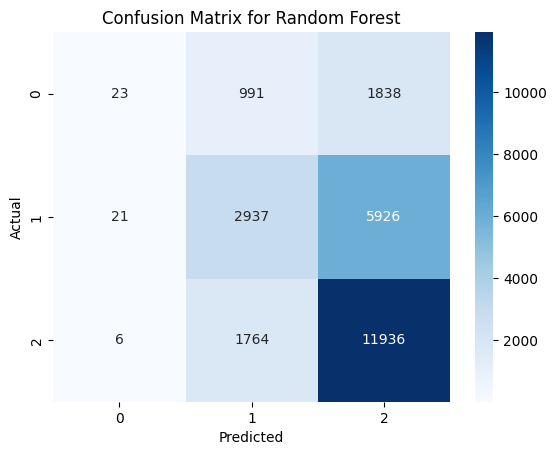

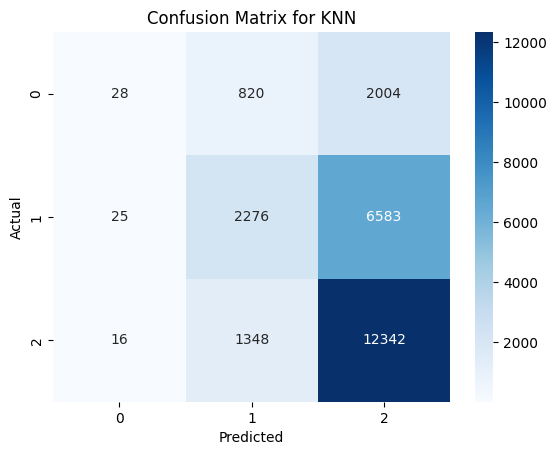

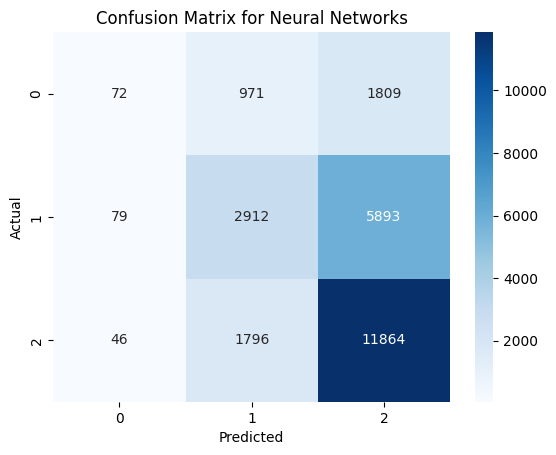

In [12]:
model_list = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_list]
f1_scores = [results[model]['f1_score'] for model in model_list]

#accuracy
plt.figure()
sns.barplot(x=model_list, y=accuracies)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

#f1 scores
plt.figure()
sns.barplot(x=model_list, y=f1_scores)
plt.title('F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

#confusion matrices
for model, conf_mtx in conf_matrices.items():
    plt.figure()
    sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(f'Confusion Matrix for {model}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

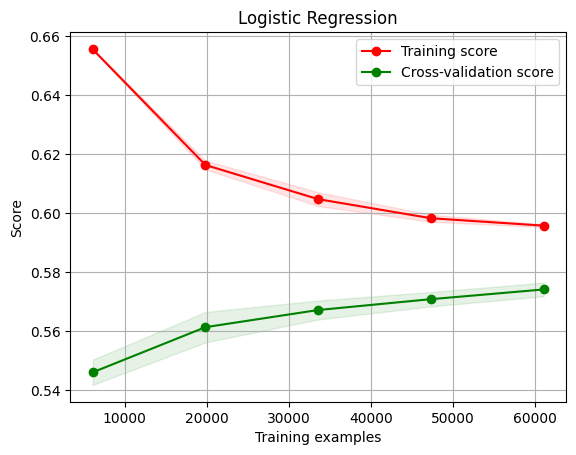

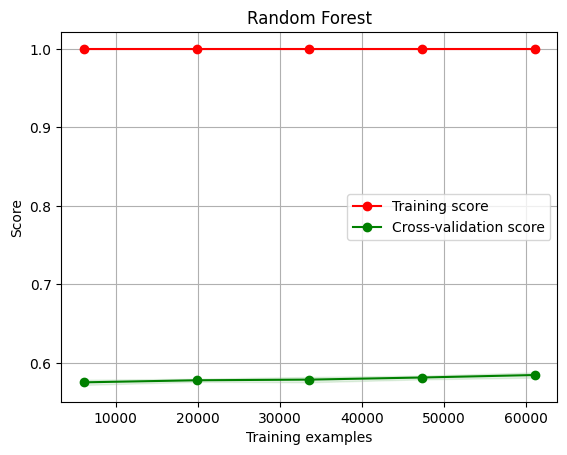

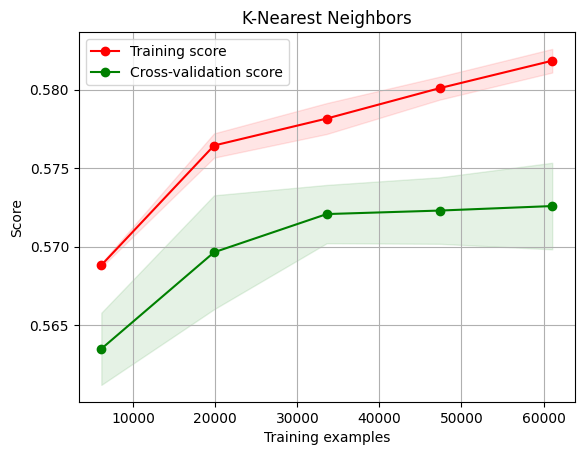

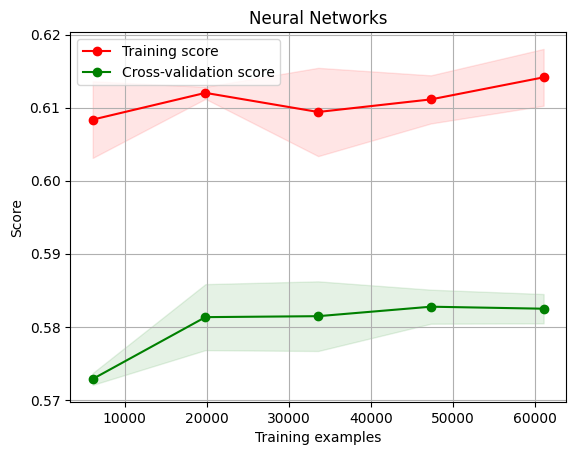

In [15]:
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes,
                       return_times=True, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

classifiers = [
    ('Logistic Regression', logistic_pipeline),
    ('Random Forest', random_forest_pipeline),
    ('K-Nearest Neighbors', knn_pipeline),
    ('Neural Networks', nn_pipeline)
]

for clf_name, clf in classifiers:
    plot_learning_curve(clf, clf_name, X_train, y_train, cv=5)
    plt.show()
